In [ ]:
pip install pandas

In [ ]:
pip install sklearn

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
dataset_url = "drive/My Drive/red_wine_quality_dataset.csv"
data = pd.read_csv(dataset_url)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
attributes_data = data.drop('quality', axis=1)
from sklearn.preprocessing import StandardScaler
X_features = attributes_data
attributes_data = StandardScaler().fit_transform(X_features)
labels_data = data['quality']
labels_data

0       2
1       2
2       2
3       1
4       2
       ..
1594    2
1595    1
1596    1
1597    2
1598    1
Name: quality, Length: 1599, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
attr_data_train, attr_data_test, lbl_data_train, lbl_data_test = train_test_split(attributes_data, labels_data, test_size=0.30)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth=25,criterion='gini')
classifier.fit(attr_data_train, lbl_data_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=25, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
label_prediction = classifier.predict(attr_data_test)
len(attr_data_test)

480

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(lbl_data_test, label_prediction))
print(classification_report(lbl_data_test, label_prediction))

[[205  57]
 [ 48 170]]
              precision    recall  f1-score   support

           1       0.81      0.78      0.80       262
           2       0.75      0.78      0.76       218

    accuracy                           0.78       480
   macro avg       0.78      0.78      0.78       480
weighted avg       0.78      0.78      0.78       480



In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(lbl_data_test, label_prediction)

0.78125

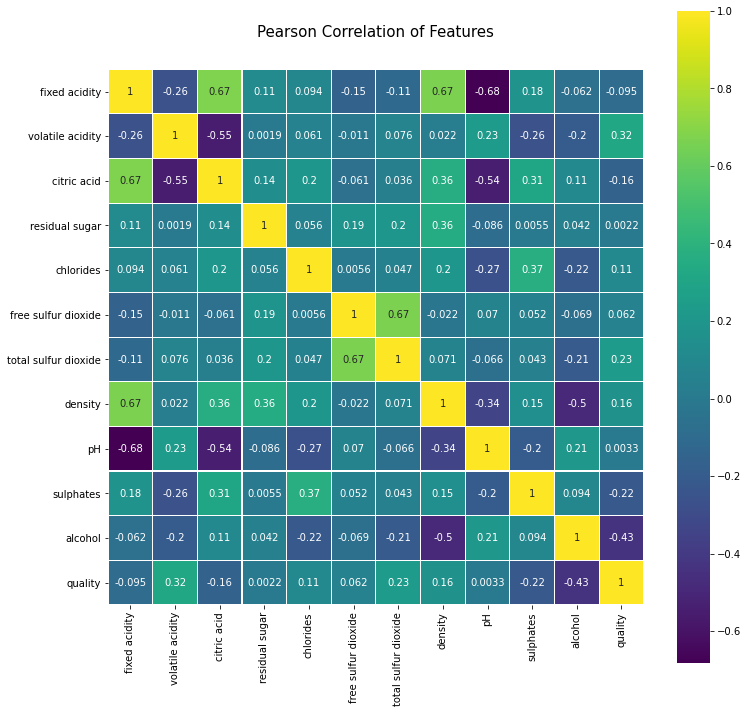

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(data.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).



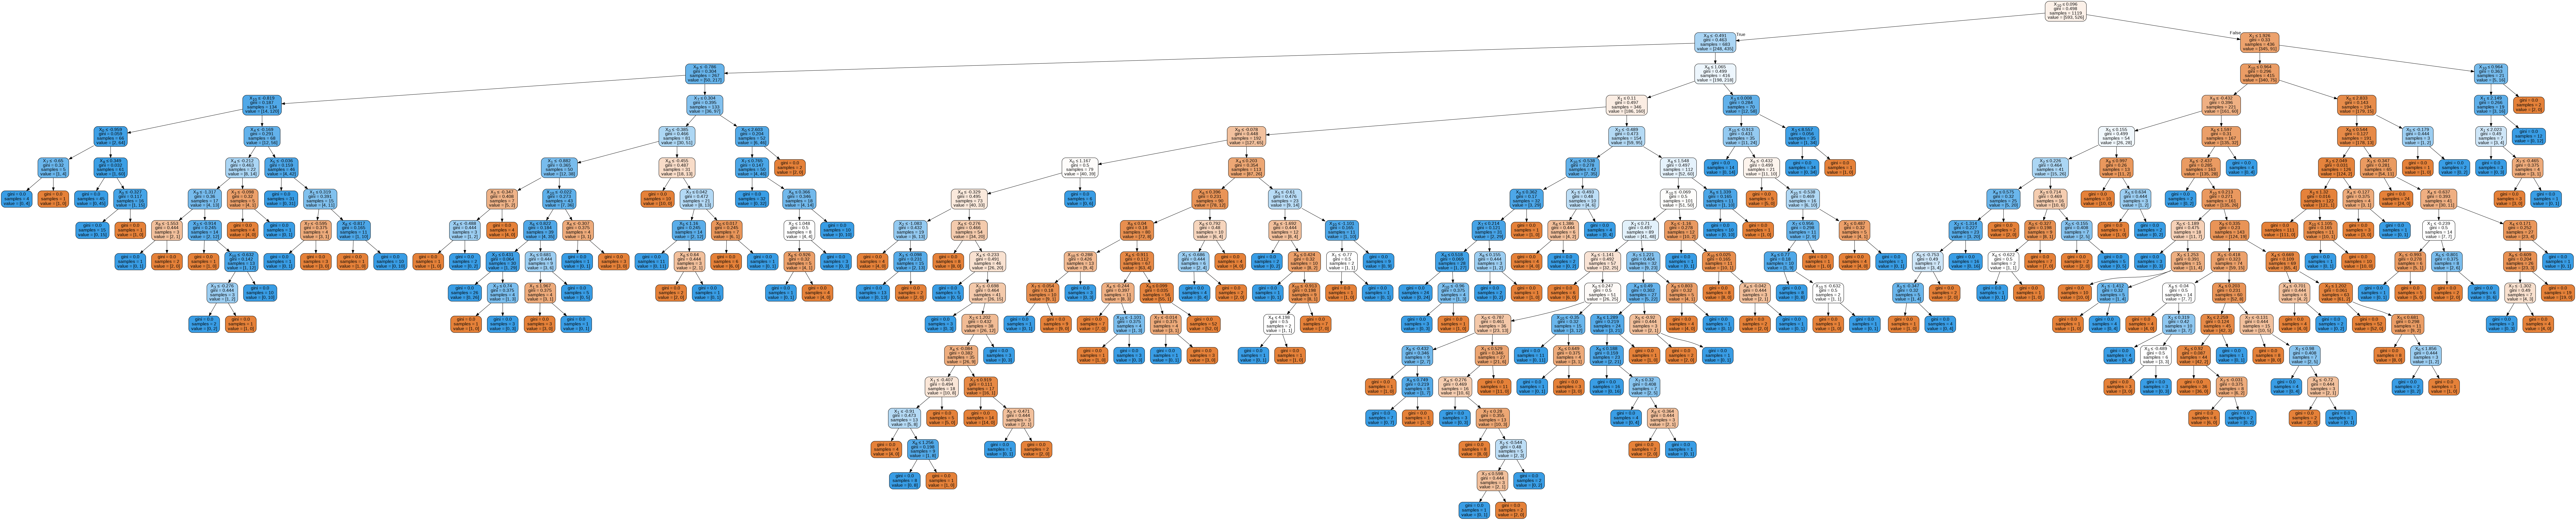

In [ ]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

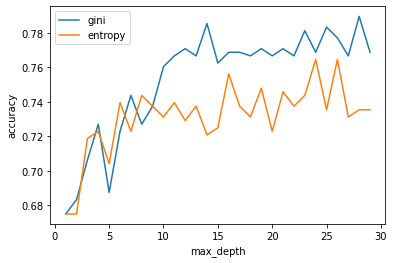

In [ ]:
max_depth = []
acc_gini = []
acc_entropy = []
for i in range(1,30):
 dtree = DecisionTreeClassifier(criterion='gini', max_depth=i)
 dtree.fit(attr_data_train, lbl_data_train)
 pred = dtree.predict(attr_data_test)
 acc_gini.append(accuracy_score(lbl_data_test, pred))
 ####
 dtree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
 dtree.fit(attr_data_train, lbl_data_train)
 pred = dtree.predict(attr_data_test)
 acc_entropy.append(accuracy_score(lbl_data_test, pred))
 ####
 max_depth.append(i)
d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
 'acc_entropy':pd.Series(acc_entropy),
 'max_depth':pd.Series(max_depth)})
# visualizing changes in parameters
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=1)
model2.fit(attr_data_train, lbl_data_train)
y_pred2 = model2.predict(attr_data_test)
print(classification_report(lbl_data_test, y_pred2))

              precision    recall  f1-score   support

           1       0.84      0.81      0.83       262
           2       0.78      0.82      0.80       218

    accuracy                           0.81       480
   macro avg       0.81      0.82      0.81       480
weighted avg       0.82      0.81      0.81       480



In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model3 = AdaBoostClassifier(random_state=1)
model3.fit(attr_data_test, lbl_data_test)
y_pred3 = model3.predict(attr_data_test)
print(classification_report(lbl_data_test, y_pred3))

              precision    recall  f1-score   support

           1       0.86      0.84      0.85       262
           2       0.81      0.84      0.82       218

    accuracy                           0.84       480
   macro avg       0.84      0.84      0.84       480
weighted avg       0.84      0.84      0.84       480



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model4 = GradientBoostingClassifier(random_state=1)
model4.fit(attr_data_train, lbl_data_train)
y_pred4 = model4.predict(attr_data_test)
print(classification_report(lbl_data_test, y_pred4))

              precision    recall  f1-score   support

           1       0.83      0.76      0.79       262
           2       0.74      0.81      0.77       218

    accuracy                           0.78       480
   macro avg       0.78      0.78      0.78       480
weighted avg       0.79      0.78      0.78       480



In [ ]:
import xgboost as xgb
model5 = xgb.XGBClassifier(random_state=1)
model5.fit(attr_data_train, lbl_data_train)
y_pred5 = model5.predict(attr_data_test)
print(classification_report(lbl_data_test, y_pred5))

              precision    recall  f1-score   support

           1       0.82      0.76      0.79       262
           2       0.74      0.80      0.77       218

    accuracy                           0.78       480
   macro avg       0.78      0.78      0.78       480
weighted avg       0.78      0.78      0.78       480



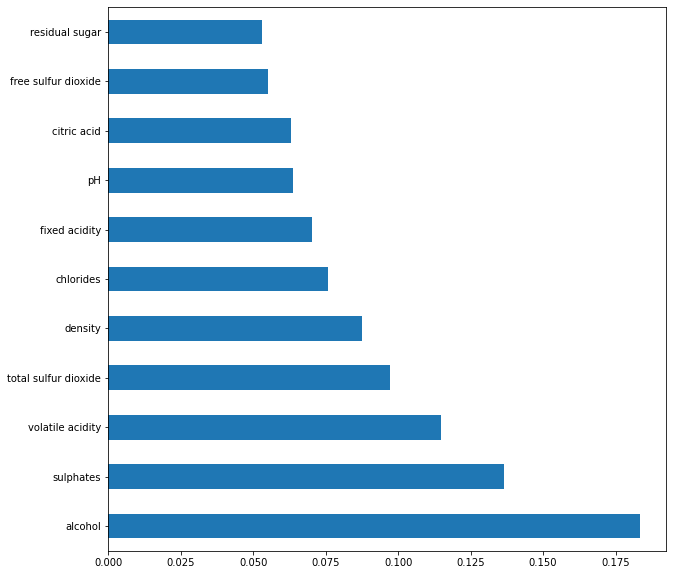

In [ ]:
feat_importances = pd.Series(model2.feature_importances_, index=X_features.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

In [ ]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(attr_data_train, lbl_data_train)

#Predict the response for test dataset
y_pred = gnb.predict(attr_data_test)

In [ ]:
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(lbl_data_test, y_pred))


Accuracy: 0.7395833333333334


## Artificial Neural Network (ANN)

In [ ]:
import pandas as pd 
import numpy as np

from keras import layers, optimizers, regularizers
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from keras.models import Sequential

from keras.utils import plot_model
#from kt_utils import *
import keras.backend as K

import seaborn as sns

from sklearn import preprocessing, model_selection 

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow


data = pd.read_csv(dataset_url)
data["quality"] =data["quality"].astype(object)




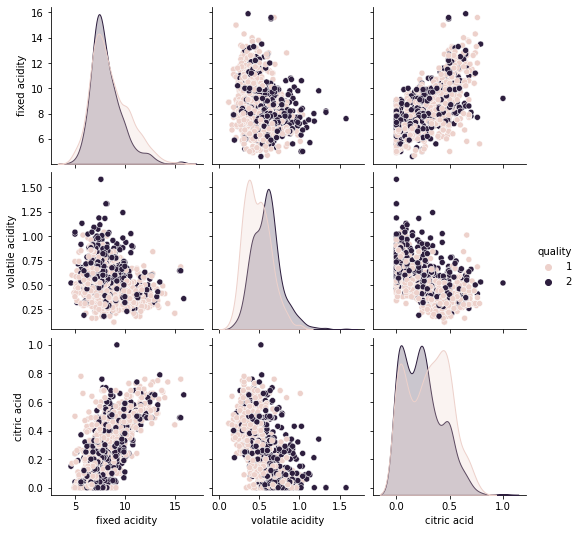

In [ ]:
g = sns.pairplot(data, vars=["fixed acidity", "volatile acidity","citric acid"], hue="quality")
plt.show(g)

In [ ]:
X = data.iloc[:,0:10].values # first columns
Y = data.iloc[:,11:].values # last columns

X = preprocessing.normalize(X, axis = 0)

X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X,Y,test_size=0.3)

print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

print(Y_train)

(1119, 10) (1119, 1) (480, 10) (480, 1)
[[2]
 [2]
 [2]
 ...
 [2]
 [2]
 [2]]


In [ ]:
winemod1 = Sequential()
# layer 1
winemod1.add(Dense(30, input_dim=10, activation='relu', name='fc0',kernel_regularizer=regularizers.l2(0.01)))
winemod1.add(BatchNormalization(momentum=0.99, epsilon=0.001))
#layer 2
winemod1.add(Dense(50, name='fc1',bias_initializer='zeros'))
winemod1.add(BatchNormalization(momentum=0.99, epsilon=0.001))
winemod1.add(Activation('tanh'))
winemod1.add(Dropout(0.5))
#layer 3
winemod1.add(Dense(100, name='fc2',bias_initializer='zeros'))
winemod1.add(BatchNormalization(momentum=0.99, epsilon=0.001))
winemod1.add(Activation('relu'))
winemod1.add(Dropout(0.5))
#layer 4
winemod1.add(Dense(1, name='fc3',bias_initializer='zeros'))
winemod1.add(BatchNormalization(momentum=0.99, epsilon=0.001))
winemod1.add(Activation('softmax'))

In [ ]:
winemod1.summary()

In [ ]:
Adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
winemod1.compile(optimizer = Adam, loss = "categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
from tensorflow import convert_to_tensor
import tensorflow as tf

X_train1 = convert_to_tensor(X_train, dtype=tf.float32)
Y_train1 = convert_to_tensor(Y_train, dtype=tf.float32)
X_test1 = convert_to_tensor(X_test, dtype=tf.float32)
Y_test1 = convert_to_tensor(Y_test, dtype=tf.float32)

winemod1.fit(x = X_train1, y = Y_train1, epochs = 200,verbose=1, batch_size = 64,validation_data=(X_test1, Y_test1))

Epoch 1/200
18/18 [==============================] - 0s 14ms/step - loss: 0.0156 - accuracy: 0.5112 - val_loss: 0.0157 - val_accuracy: 0.5896
Epoch 2/200
18/18 [==============================] - 0s 4ms/step - loss: 0.0156 - accuracy: 0.5112 - val_loss: 0.0156 - val_accuracy: 0.5896
Epoch 3/200
18/18 [==============================] - 0s 4ms/step - loss: 0.0155 - accuracy: 0.5112 - val_loss: 0.0156 - val_accuracy: 0.5896
Epoch 4/200
18/18 [==============================] - 0s 4ms/step - loss: 0.0156 - accuracy: 0.5112 - val_loss: 0.0156 - val_accuracy: 0.5896
Epoch 5/200
18/18 [==============================] - 0s 4ms/step - loss: 0.0156 - accuracy: 0.5112 - val_loss: 0.0156 - val_accuracy: 0.5896
Epoch 6/200
18/18 [==============================] - 0s 4ms/step - loss: 0.0156 - accuracy: 0.5112 - val_loss: 0.0155 - val_accuracy: 0.5896
Epoch 7/200
18/18 [==============================] - 0s 3ms/step - loss: 0.0155 - accuracy: 0.5112 - val_loss: 0.0155 - val_accuracy: 0.5896
Epoch 8/200


In [ ]:
preds = winemod1.evaluate(x = X_test1, y = Y_test1)
print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

15/15 [==============================] - 0s 2ms/step - loss: 0.0192 - accuracy: 0.5896

Loss = 0.019224822521209717
Test Accuracy = 0.5895833373069763
